In [ ]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Data integration

### URLs
- https://github.com/jorisvandenbossche/2015-PyDataParis

### Working with a Pandas dataframe

<img src="https://github.com/FIIT-IAU/2015-PyDataParis/raw/b900fdb9f3c12e9206bb417022dd004abf023c0f/img/dataframe.png" width="50%" height="50%" />


# Case study: Air quality in Europe
**[European air quality information reported by EEA member countries](https://www.eea.europa.eu/data-and-maps/data#c0=5&c11=&c5=all&b_start=0).**

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
filename = "data/input/BETR8010000800100hour.1-1-1990.31-12-2012"
df = pd.read_csv(filename)
df.head()

,1990-01-01\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0
0,1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...
1,1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...
2,1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...
3,1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...
4,1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...


Vidíme, že pri načítaní nastalo viacero problémov. Skúsme sa teda pozrieť na dáta v nejakom editore predtým, ako ich načítame:

In [3]:
%%bash
head data/input/BETR8010000800100hour.1-1-1990.31-12-2012

Couldn't find program: 'bash'


z tohoto zatiaľ vieme asi len to, že pôjde o **csv formát, separátor hodnôt je \t**, sú tam samé numerické dáta a nemáme pomenované atribúty.

In [4]:
%%bash
ls -lh data/input/BETR8010000800100hour.1-1-1990.31-12-2012

Couldn't find program: 'bash'


In [5]:
%%bash 
wc -l data/input/BETR8010000800100hour.1-1-1990.31-12-2012

Couldn't find program: 'bash'


Takže tých dat nie je zas tak veľa a nemusím sa báť to všetko načítať do pamäte

In [6]:
data = pd.read_csv(filename, 
                   sep='\t', 
                   header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1990-01-01,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
1,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
3,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


Máme 49 stĺpcov. Dátum a 48 ďalších numerických atribútov. Každý druhý sa zdá byt binárny. Asi nejaký príznak.

Dáta sú tvorené meraniami nejakej veličiny asi v jednotlivých hodinách dňa. 

Čo deň, to riadok. Každá hodina má zvlášť stĺpec + je tu stĺpec pre nejaký príznak, ktorý nás teraz nezaujíma.

Sú tam nejaké divné hodnoty, ktoré by tam asi nemali byť: -999 a -9999.

Dátum bude asi index

In [7]:
data = pd.read_csv(filename, 
                   sep='\t', 
                   header=None,
                   na_values=[-999, -9999], 
                   index_col=0
                  )
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [8]:
# skusime povyhadzovat tie flagy, ktore nas nezaujimaju. Zhodou okolnosti je to kazdy druhy stlpec
data.columns[1::2]

Int64Index([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
            36, 38, 40, 42, 44, 46, 48],
           dtype='int64')

In [9]:
data = data.drop(data.columns[1::2], 
                 axis=1)
data.head()

,1,3,5,7,9,11,13,15,17,19,...,29,31,33,35,37,39,41,43,45,47
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Skusme si nejak normalne pomenovat vzniknute stlpce
["{:02d}".format(i) for i in range(len(data.columns))]

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [11]:
# mam nejako rozsypane nazvy stlpcov
data.columns = ["{:02d}".format(i) for i in range(len(data.columns))]
data.head()

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Skúsme presunúť každé meranie na samostatný riadok**

In [12]:
data = data.stack()
data.head()

1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
            15    59.0
dtype: float64

In [13]:
# vysledok preusporiadania je viacdimenzionalny Series objekt, a nie DataFrame.
type(data)  

pandas.core.series.Series

In [14]:
# mohli by sme nejak normalne pomenovat stlpec, napr. nazvom meracej stanice, ktora je v nazve suboru
_, fname = os.path.split(filename)
station = fname[:7]
print(filename)
print(station)

data/input/BETR8010000800100hour.1-1-1990.31-12-2012
BETR801


In [15]:
#reset index mi z toho spravi data frame
data = data.reset_index(name=station) 
# data = data.reset_index() 

print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,0,level_1,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [16]:
data = data.rename(columns = {0:'date', 'level_1':'hour'})
data.head()

,date,hour,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [17]:
# teraz tomu vyrobime novy index z datumu a hodiny
data.index = pd.to_datetime(data['date'] + ' ' + data['hour'])
data.head()

,date,hour,BETR801
1990-01-02 09:00:00,1990-01-02,09,48.0
1990-01-02 12:00:00,1990-01-02,12,48.0
1990-01-02 13:00:00,1990-01-02,13,50.0
1990-01-02 14:00:00,1990-01-02,14,55.0
1990-01-02 15:00:00,1990-01-02,15,59.0


In [18]:
# zmazeme nepotrebne stlpce
data = data.drop(['date', 'hour'], axis=1)
data.head()

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


# Above-code for one station is inserted into the python file  `airbase.py`
**We are going to work with more stations.**

In [19]:
import airbase
no2 = airbase.load_data()

In [20]:
no2.head(3)

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16.0,NaN,NaN
1990-01-01 01:00:00,NaN,18.0,NaN,NaN
1990-01-01 02:00:00,NaN,21.0,NaN,NaN


In [21]:
no2.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0
2012-12-31 23:00:00,15.0,3.0,13.0,49.0


In [22]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198895 entries, 1990-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   BETR801  170794 non-null  float64
 1   BETN029  174807 non-null  float64
 2   FR04037  120384 non-null  float64
 3   FR04012  119448 non-null  float64
dtypes: float64(4)
memory usage: 7.6 MB


In [23]:
no2.describe()

,BETR801,BETN029,FR04037,FR04012
count,170794.000000,174807.000000,120384.000000,119448.000000
mean,47.914561,16.687756,40.040005,87.993261
std,22.230921,13.106549,23.024347,41.317684
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,7.000000,23.000000,61.000000
50%,46.000000,12.000000,37.000000,88.000000
75%,61.000000,23.000000,54.000000,115.000000
max,339.000000,115.000000,256.000000,358.000000


<AxesSubplot: >

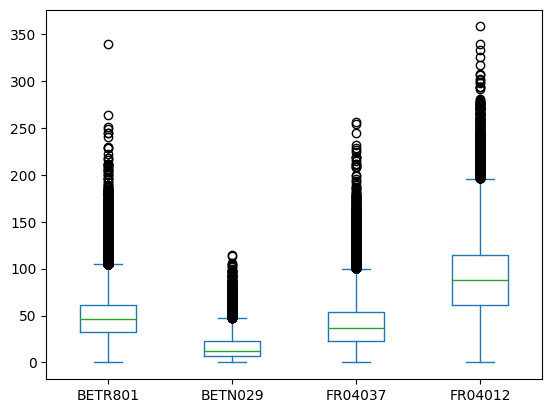

In [24]:
no2.plot(kind='box')

<AxesSubplot: >

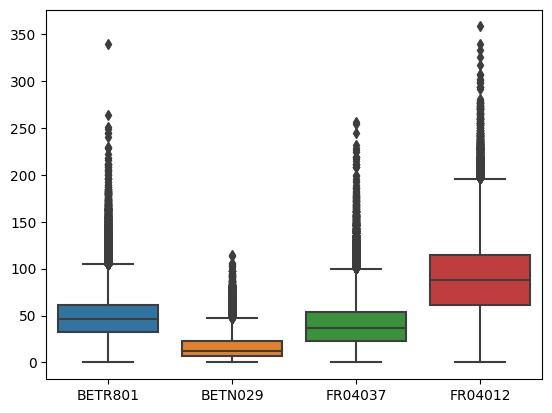

In [25]:
# boxplot vie ukazat aj outlierov
# sns.boxplot(no2, sym='k.')
sns.boxplot(data=no2, sym='k.')

<AxesSubplot: ylabel='Frequency'>

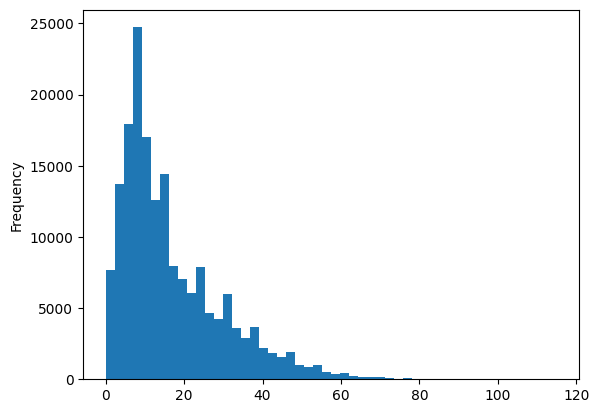

In [26]:
no2['BETN029'].plot(kind='hist', bins=50)

<AxesSubplot: >

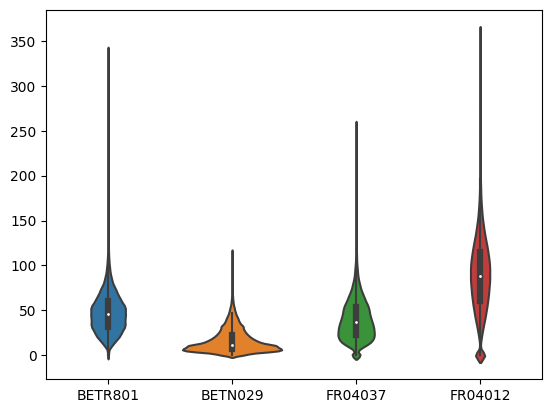

In [27]:
sns.violinplot(data=no2)

<AxesSubplot: >

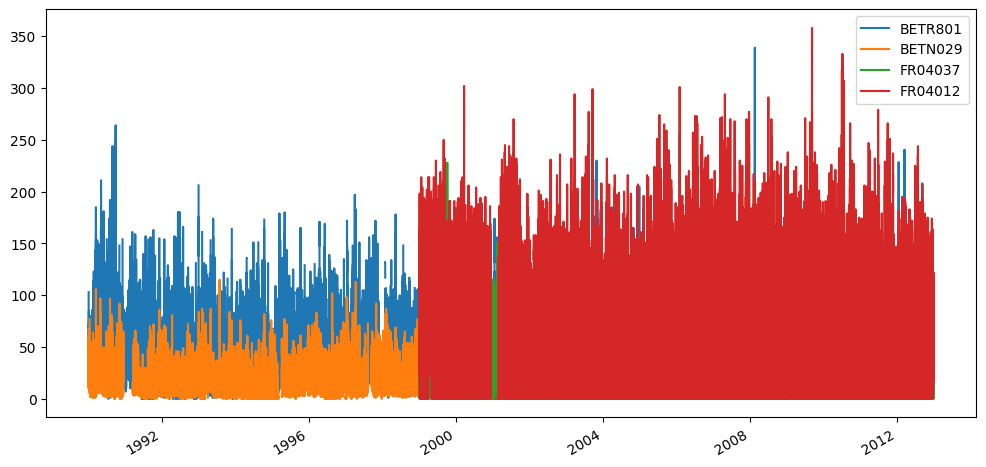

In [28]:
# first plotting
no2.plot(figsize=(12,6))

<AxesSubplot: >

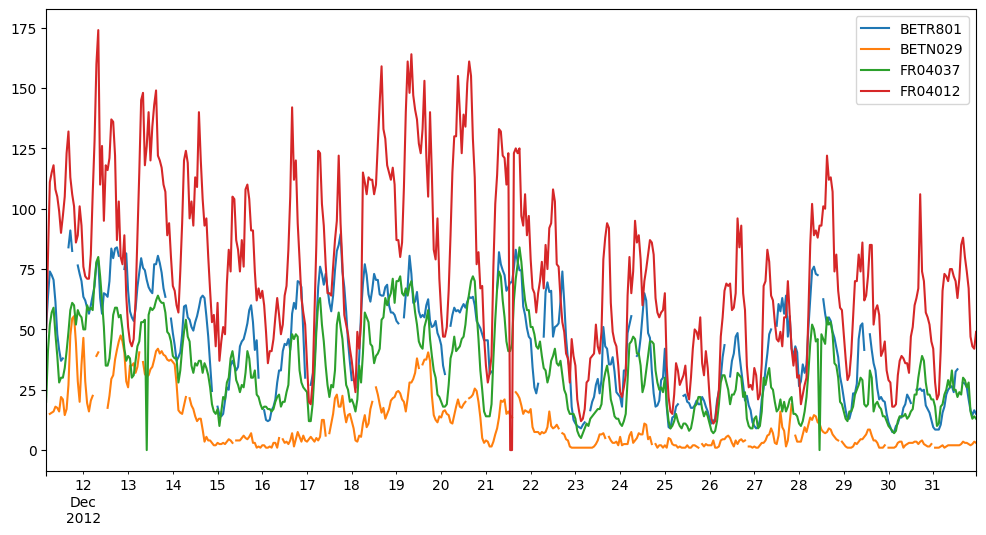

In [29]:
# mozem si povedat, ze chcem len nejaku mensiu cast
no2[-500:].plot(figsize=(12,6))

**Alebo použijem zaujímavejšie operácie s timeseries**

In [30]:
# kedze index su casy, tak viem robit s nimi zaujimave veci
no2.index 

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 01:00:00',
               '1990-01-01 02:00:00', '1990-01-01 03:00:00',
               '1990-01-01 04:00:00', '1990-01-01 05:00:00',
               '1990-01-01 06:00:00', '1990-01-01 07:00:00',
               '1990-01-01 08:00:00', '1990-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=198895, freq=None)

In [31]:
# napriklad definovat rozsahy pomocou retazca s datumom
no2["2010-01-01 09:00": "2010-01-01 12:00"] 

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17.0,7.0,19.0,41.0
2010-01-01 10:00:00,18.0,5.0,21.0,48.0
2010-01-01 11:00:00,17.0,4.0,23.0,63.0
2010-01-01 12:00:00,18.0,4.0,22.0,57.0


In [32]:
# alebo takto vybrat vsetky data z jedneho konkretneho roku
no2.loc['2012']
# no2['2012'] 
# no2['2012'].head()

# alebo len data z marca
# no2['2012/03'] 

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17.0,56.0
2012-01-01 01:00:00,18.0,1.0,16.0,50.0
2012-01-01 02:00:00,20.0,1.0,14.0,46.0
2012-01-01 03:00:00,16.0,1.0,17.0,47.0
2012-01-01 04:00:00,13.0,1.0,18.0,45.0
...,...,...,...,...
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0


In [33]:
# komponenty datumu su pristupne z indexu
# no2.index.hour
no2.index.year

Int64Index([1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', length=198895)

In [34]:
# a co je zaujimavejsie, viem zmenit vzorkovaciu frekvenciu
no2.resample('D').mean().head()

,BETR801,BETN029,FR04037,FR04012
1990-01-01,NaN,21.500000,NaN,NaN
1990-01-02,53.923077,35.000000,NaN,NaN
1990-01-03,63.000000,29.136364,NaN,NaN
1990-01-04,65.250000,42.681818,NaN,NaN
1990-01-05,63.846154,40.136364,NaN,NaN


<AxesSubplot: >

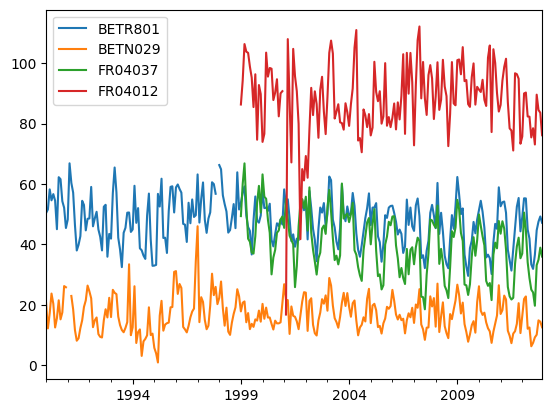

In [35]:
# je tu asi nejaka sezonnost?
no2.resample('M').mean().plot()

<AxesSubplot: >

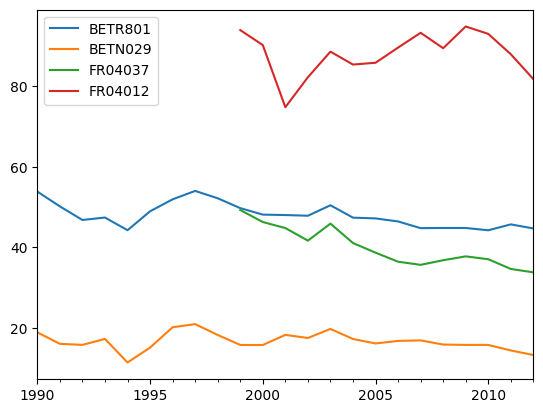

In [36]:
# dlhodoby trend?
no2.resample('A').mean().plot()

<AxesSubplot: >

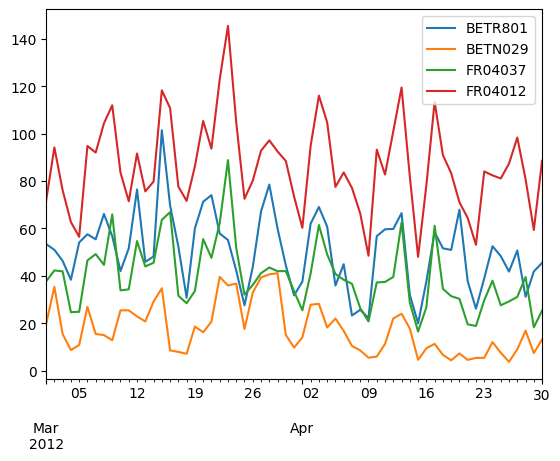

In [37]:
# tyzdenna sezonnost?
no2['2012-3':'2012-4'].resample('D').mean().plot()

<AxesSubplot: >

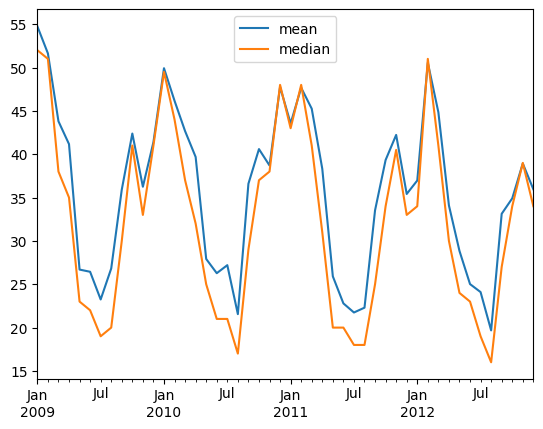

In [42]:
# mozem pouzit aj viacero agregacnych funkcii a porovnat si ich
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()
# no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'std']).plot()

## Pozor resample != groupby

<AxesSubplot: >

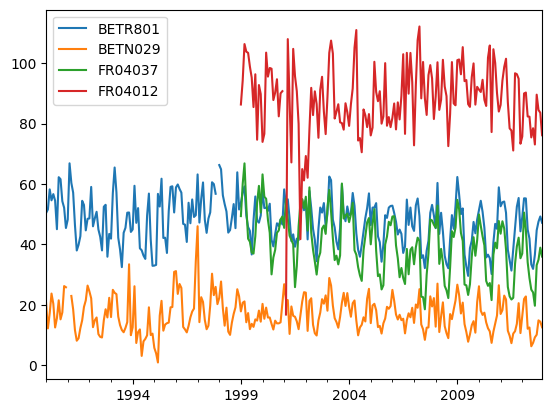

In [39]:
# Toto je časový priebeh s mesačnou granularitou. Spriemerované sú hodnoty v priebehu mesiaca
no2.resample('M').mean().plot()

<AxesSubplot: >

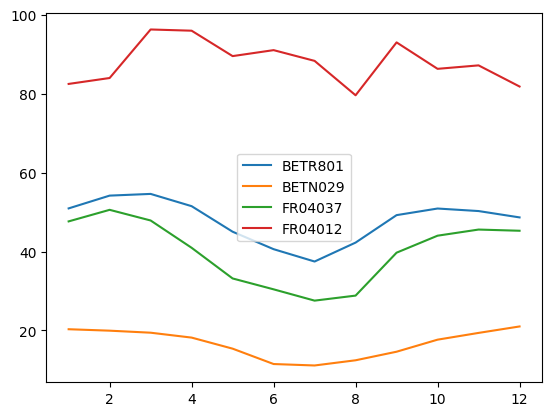

In [40]:
# Toto sú spriemerované všetky hodnoty pre mesiac s daným číslom. Aj naprieč rokmi. 
# Získal som teda priemerný priebeh hodnoty počas roka s mesačnou granularitou.
no2.groupby(no2.index.month).mean().plot()

# Sumár, čo si zobrať z tejto EDA

* Uistite sa, že dáta sú kódované správne (najčastejšie sa treba pozrieť manuálne do dát)
* Uistite sa, že dáta spadajú do očakávaného rozsahu a všetky majú očakávaný tvar (napríklad formát času)
* Nikdy nemeňte dáta manuálne. Vždy používajte kód, ktorý si odložíte a použijete vždy, keď budete opakovať experiment. Chceme, aby bola analýza reprodukovateľná
* Spravte si grafy všetkého, čo sa len dá, aby ste si vizuálne potvrdili, že niečo je tak, ako by malo byt